In [677]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error, confusion_matrix

In [679]:
df = pd.read_csv("student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [681]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

## EDA

### Визуализация

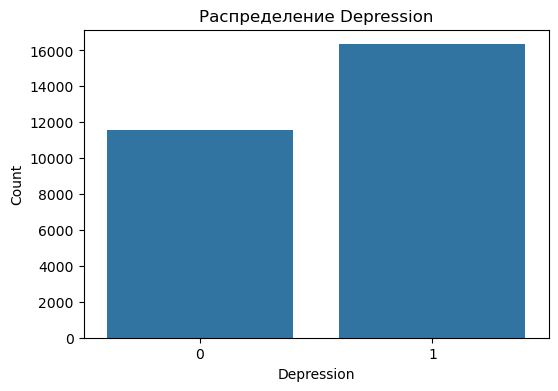

In [685]:
# Распределение целевой переменной
plt.figure(figsize=(6,4))
sns.countplot(x='Depression', data=df)
plt.title('Распределение Depression')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.show()

Пояснение:

В наборе явное преобладание депрессии. Количество людей с признаками депрессии значительно превышает число людей без депрессии.

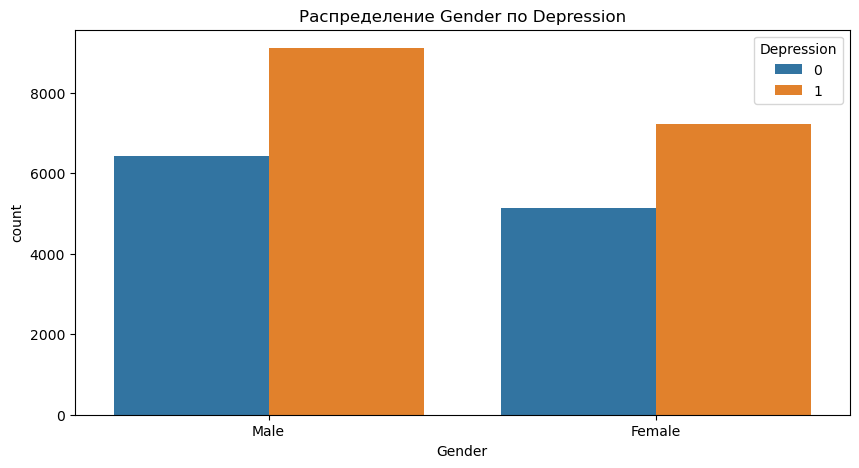

In [688]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender', hue='Depression', data=df)
plt.title('Распределение Gender по Depression')
plt.show()

Пояснение:

Распределение по полу и депрессии показывает, что мужчины имеют несколько более высокую склонность к депрессии по сравнению с женщинами.

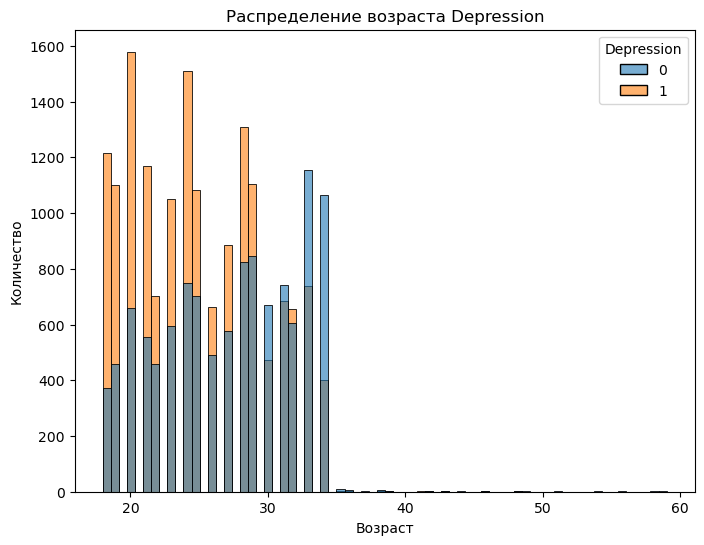

In [690]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Age', hue='Depression', alpha=0.6)
plt.title('Распределение возраста Depression')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

Пояснение:

Также, по распределению возраста, можем заметить, что признаки депрессии заметны преимущественно у молодых людей до 30 лет. После этого возраста симптомы депрессии сильно не проявляются, что указывает на склонность депрессии к более молодой возрастной группе. 

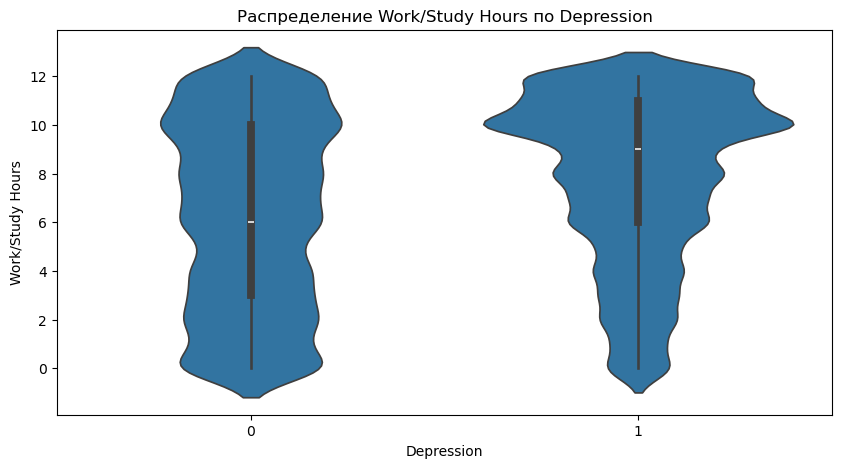

In [693]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Depression', y='Work/Study Hours', data=df)
plt.title('Распределение Work/Study Hours по Depression')
plt.xlabel('Depression')
plt.ylabel('Work/Study Hours')
plt.show()

Пояснение:

По графику можно проследить, что среднее количество часов в день, которое студент посвящает работе или учебе, оказывает влияние на уровень стресса и депрессии. Чем больше времени студент уделяет учебе, тем выше вероятность проявления признаков депрессии.

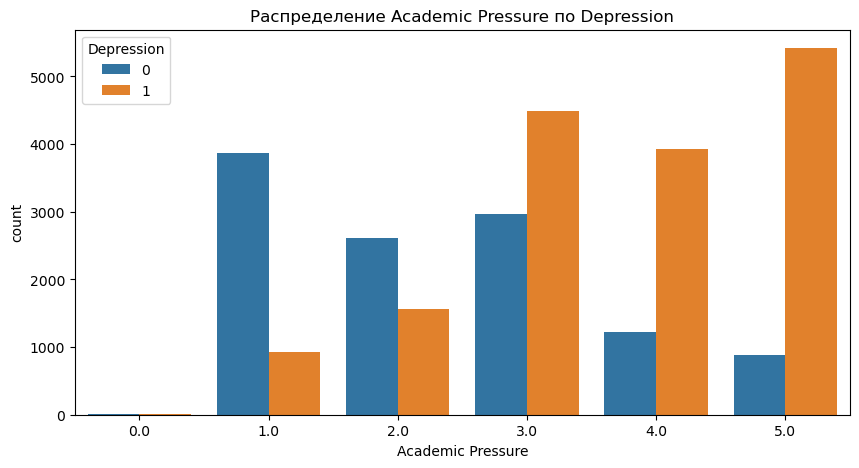

In [696]:
plt.figure(figsize=(10,5))
sns.countplot(x='Academic Pressure', hue='Depression', data=df)
plt.title('Распределение Academic Pressure по Depression')
plt.show()

Пояснение:

По графику можно увидеть показатель уровня психологического давления, которое испытывает студент в учебной среде. Также наблюдается тенденция, что с увеличением этого давления растёт уровень депрессии.

### Зависимости

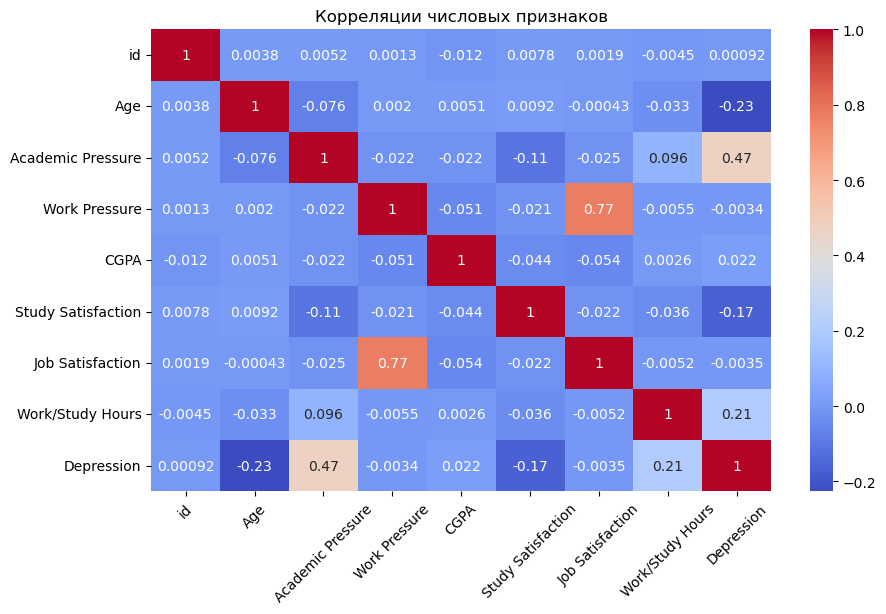

In [700]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Корреляции числовых признаков")
plt.xticks(rotation=45)
plt.show()

Корреляции с Depression:

- **Work Pressure, Job Satis, CGPA** - связи около нуля -> не влияют
- **Academic Pressure** - чем больше давления, тем больше депрессии
- **Age**: -0,23 -> слабая отрицательная связь. С увеличением возраста склонность к признакам депрессии в среднем постепенно уменьшается
- **Study Satisfaction**: -0,17 -> отрицательную связь. Выше уровень удовлетворенности учебным процессом соответствует лучшему психическому благополучию
- **Work/Study Hours**: -0,21 -> увеличение учебной нагрузки может повышать уровень стресса


### Аномалии

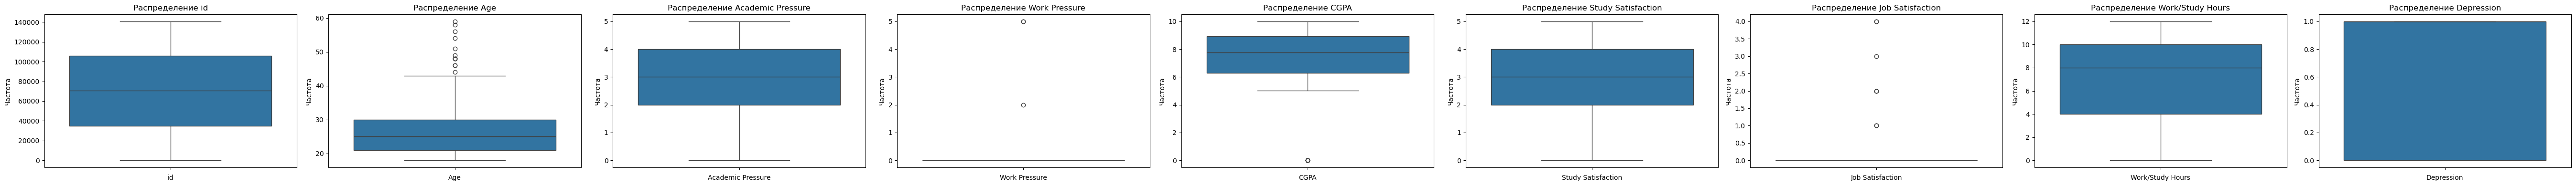

In [704]:
num_cols = df.select_dtypes(include=['float', 'int']).columns 
fig, axes = plt.subplots(1, len(num_cols), figsize=(6 * len(num_cols), 4))

for ax, col in zip(axes, num_cols):
   sns.boxplot(df[col], ax=ax)
   ax.set_title(f'Распределение {col}')
   ax.set_xlabel(col)
   ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()

### Duplicate

In [707]:
df.nunique() # уникальные значения

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             6
Family History of Mental Illness             2
Depression                                   2
dtype: int64

In [708]:
df.duplicated().sum() # дубликатов не выявлено

0

### Пропуски

In [710]:
df.isnull().sum().sum() # пропусков не выявлено

0

### Типы данных

In [712]:
categorial_features  = list(df.select_dtypes(include=['object']).columns)

print(categorial_features)

['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']


In [713]:
df[categorial_features]

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness
0,Male,Visakhapatnam,Student,'5-6 hours',Healthy,B.Pharm,Yes,1.0,No
1,Female,Bangalore,Student,'5-6 hours',Moderate,BSc,No,2.0,Yes
2,Male,Srinagar,Student,'Less than 5 hours',Healthy,BA,No,1.0,Yes
3,Female,Varanasi,Student,'7-8 hours',Moderate,BCA,Yes,5.0,Yes
4,Female,Jaipur,Student,'5-6 hours',Moderate,M.Tech,Yes,1.0,No
...,...,...,...,...,...,...,...,...,...
27896,Female,Surat,Student,'5-6 hours',Unhealthy,'Class 12',Yes,1.0,Yes
27897,Male,Ludhiana,Student,'Less than 5 hours',Healthy,MSc,No,3.0,Yes
27898,Male,Faridabad,Student,'5-6 hours',Unhealthy,MD,No,2.0,No
27899,Female,Ludhiana,Student,'Less than 5 hours',Healthy,'Class 12',Yes,5.0,No


In [714]:
for i in categorial_features:
    print(f"Unique for {i}: {df[i].unique()}\n")

Unique for Gender: ['Male' 'Female']

Unique for City: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']

Unique for Profession: ['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']

Unique for Sleep Duration: ["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']

Unique for Dietary Habits: ['Healthy' 'Moderate' 'Unhealthy' 'Others']

Unique for Degr

In [715]:
print((df['Financial Stress'] == '?').sum())

3


In [717]:
df = df[df['Financial Stress'] != '?']
df['Financial Stress'] = df['Financial Stress'].astype(float)

In [719]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27898 non-null  int64  
 1   Gender                                 27898 non-null  object 
 2   Age                                    27898 non-null  float64
 3   City                                   27898 non-null  object 
 4   Profession                             27898 non-null  object 
 5   Academic Pressure                      27898 non-null  float64
 6   Work Pressure                          27898 non-null  float64
 7   CGPA                                   27898 non-null  float64
 8   Study Satisfaction                     27898 non-null  float64
 9   Job Satisfaction                       27898 non-null  float64
 10  Sleep Duration                         27898 non-null  object 
 11  Dietary

In [723]:
categorial_features  = list(df.select_dtypes(include=['object']).columns)
numeric_features = list(df.select_dtypes(include=['float', 'int']).columns)

best_features = ["Academic Pressure", "Age", "Study Satisfaction", "Work/Study Hours", "Gender"]

In [728]:
binary_cols = [i for i in categorial_features if df[i].nunique() == 2]
caterigal_cols = [i for i in categorial_features if df[i].nunique() > 2]

In [730]:
le = LabelEncoder()
for i in binary_cols:
    df[i] = le.fit_transform(df[i])

In [731]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[caterigal_cols])

In [733]:
X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
X_encoded

,City_'Less Delhi',City_'Less than 5 Kalyan',City_3.0,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhavna,City_Bhopal,City_Chennai,City_City,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [735]:
df = df.drop(caterigal_cols, axis=1)
df = pd.concat([df.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

In [736]:
df

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,2,1,33.0,5.0,0.0,8.97,2.0,0.0,1,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,0,24.0,2.0,0.0,5.90,5.0,0.0,0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,1,31.0,3.0,0.0,7.03,5.0,0.0,0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,0,28.0,3.0,0.0,5.59,2.0,0.0,1,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,0,25.0,4.0,0.0,8.13,3.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,140685,0,27.0,5.0,0.0,5.75,5.0,0.0,1,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27894,140686,1,27.0,2.0,0.0,9.40,3.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27895,140689,1,31.0,3.0,0.0,6.61,4.0,0.0,0,12.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27896,140690,0,18.0,5.0,0.0,6.88,2.0,0.0,1,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [739]:
df.isnull().sum().sum()

0

In [741]:
df.isnull().values.any() #проверка на NaN

False

In [743]:
scaler = StandardScaler()
df[numeric_cols[1:-1]] = scaler.fit_transform(df[numeric_cols[1:-1]])

In [746]:
df

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,2,1,1.463201,1.345456,-0.009777,0.893354,-0.693539,-0.01534,1,-1.121115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,0,-0.371450,-0.826195,-0.009777,-1.194113,1.510565,-0.01534,0,-1.121115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,1,1.055501,-0.102311,-0.009777,-0.425762,1.510565,-0.01534,0,0.497212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,0,0.443950,-0.102311,-0.009777,-1.404899,-0.693539,-0.01534,1,-0.851394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,0,-0.167600,0.621573,-0.009777,0.322191,0.041162,-0.01534,1,-1.660558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,140685,0,0.240100,1.345456,-0.009777,-1.296106,1.510565,-0.01534,1,-0.042230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27894,140686,1,0.240100,-0.826195,-0.009777,1.185735,0.041162,-0.01534,0,-1.930279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27895,140689,1,1.055501,-0.102311,-0.009777,-0.711343,0.775863,-0.01534,0,1.306376,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27896,140690,0,-1.594552,1.345456,-0.009777,-0.527755,-0.693539,-0.01534,1,0.766933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [748]:
X = df.drop("Depression", axis=1)
y = df.Depression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_best = df[best_features]

X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y, test_size=0.33, random_state=42)

In [750]:
def graph_coef(coefs, feature_names, title):

    plt.figure(figsize=(12, max(6, len(coefs)*0.3))) 
    plt.barh(feature_names, coefs, color='skyblue', edgecolor='black')
    plt.xlabel('Коэффициенты')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

In [751]:
def metrics(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"MAE: {round(mae, 3)}")
    print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (mape, mape * 100, '%'))
    print(f"MSE: {round(mse, 3)}")
    print(f"RMSE: {round(rmse, 3)}")
    print(f"R²: {round(r2, 3)}\n")

## Model №1


- Использовать все признаки (кроме y).
- Обучить на всей выборке (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef_ vs X_scaled.columns) и интерпретировать.


In [756]:
model1 = LinearRegression()
model1.fit(X, y)

LinearRegression()

In [759]:
y_pred1 = model1.predict(X)

In [761]:
metrics(y, y_pred1)

MAE: 0.267
MAPE=575632823828826.000, MAPE_as_percent=57563282382882600.000%
MSE: 0.116
RMSE: 0.341
R²: 0.52



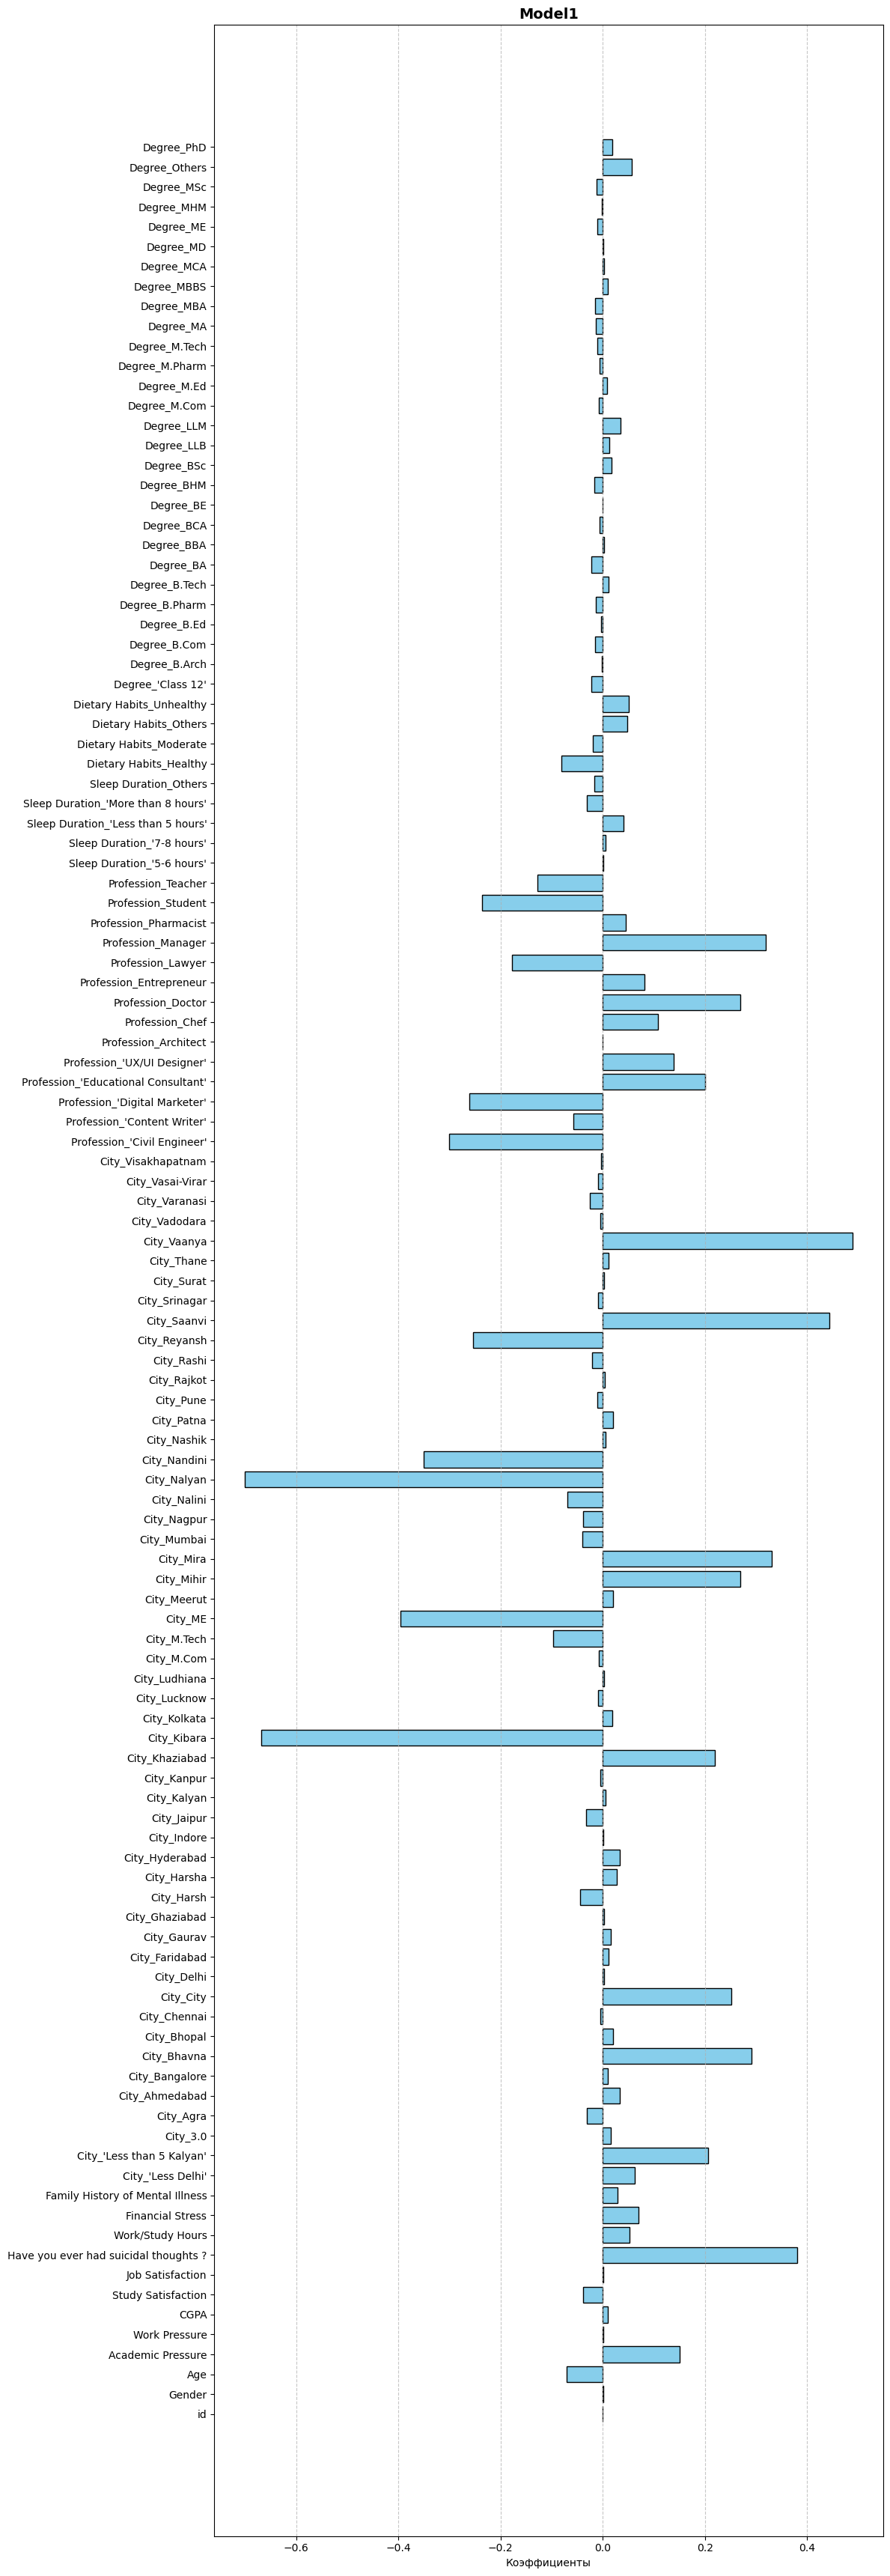

In [762]:
graph_coef(model1.coef_, X.columns, "Model1")

## Model №2

- Использовать все признаки.
- Сделать train_test_split.
- Обучить на X_train, предсказать на X_train и X_test.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

In [767]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [768]:
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

Train

In [770]:
metrics(y_train, y_train_pred2)

MAE: 0.266
MAPE=571872947258972.750, MAPE_as_percent=57187294725897272.000%
MSE: 0.116
RMSE: 0.341
R²: 0.52



Test

In [772]:
metrics(y_test, y_test_pred2)

MAE: 0.268
MAPE=596112844732550.125, MAPE_as_percent=59611284473255016.000%
MSE: 0.117
RMSE: 0.343
R²: 0.517



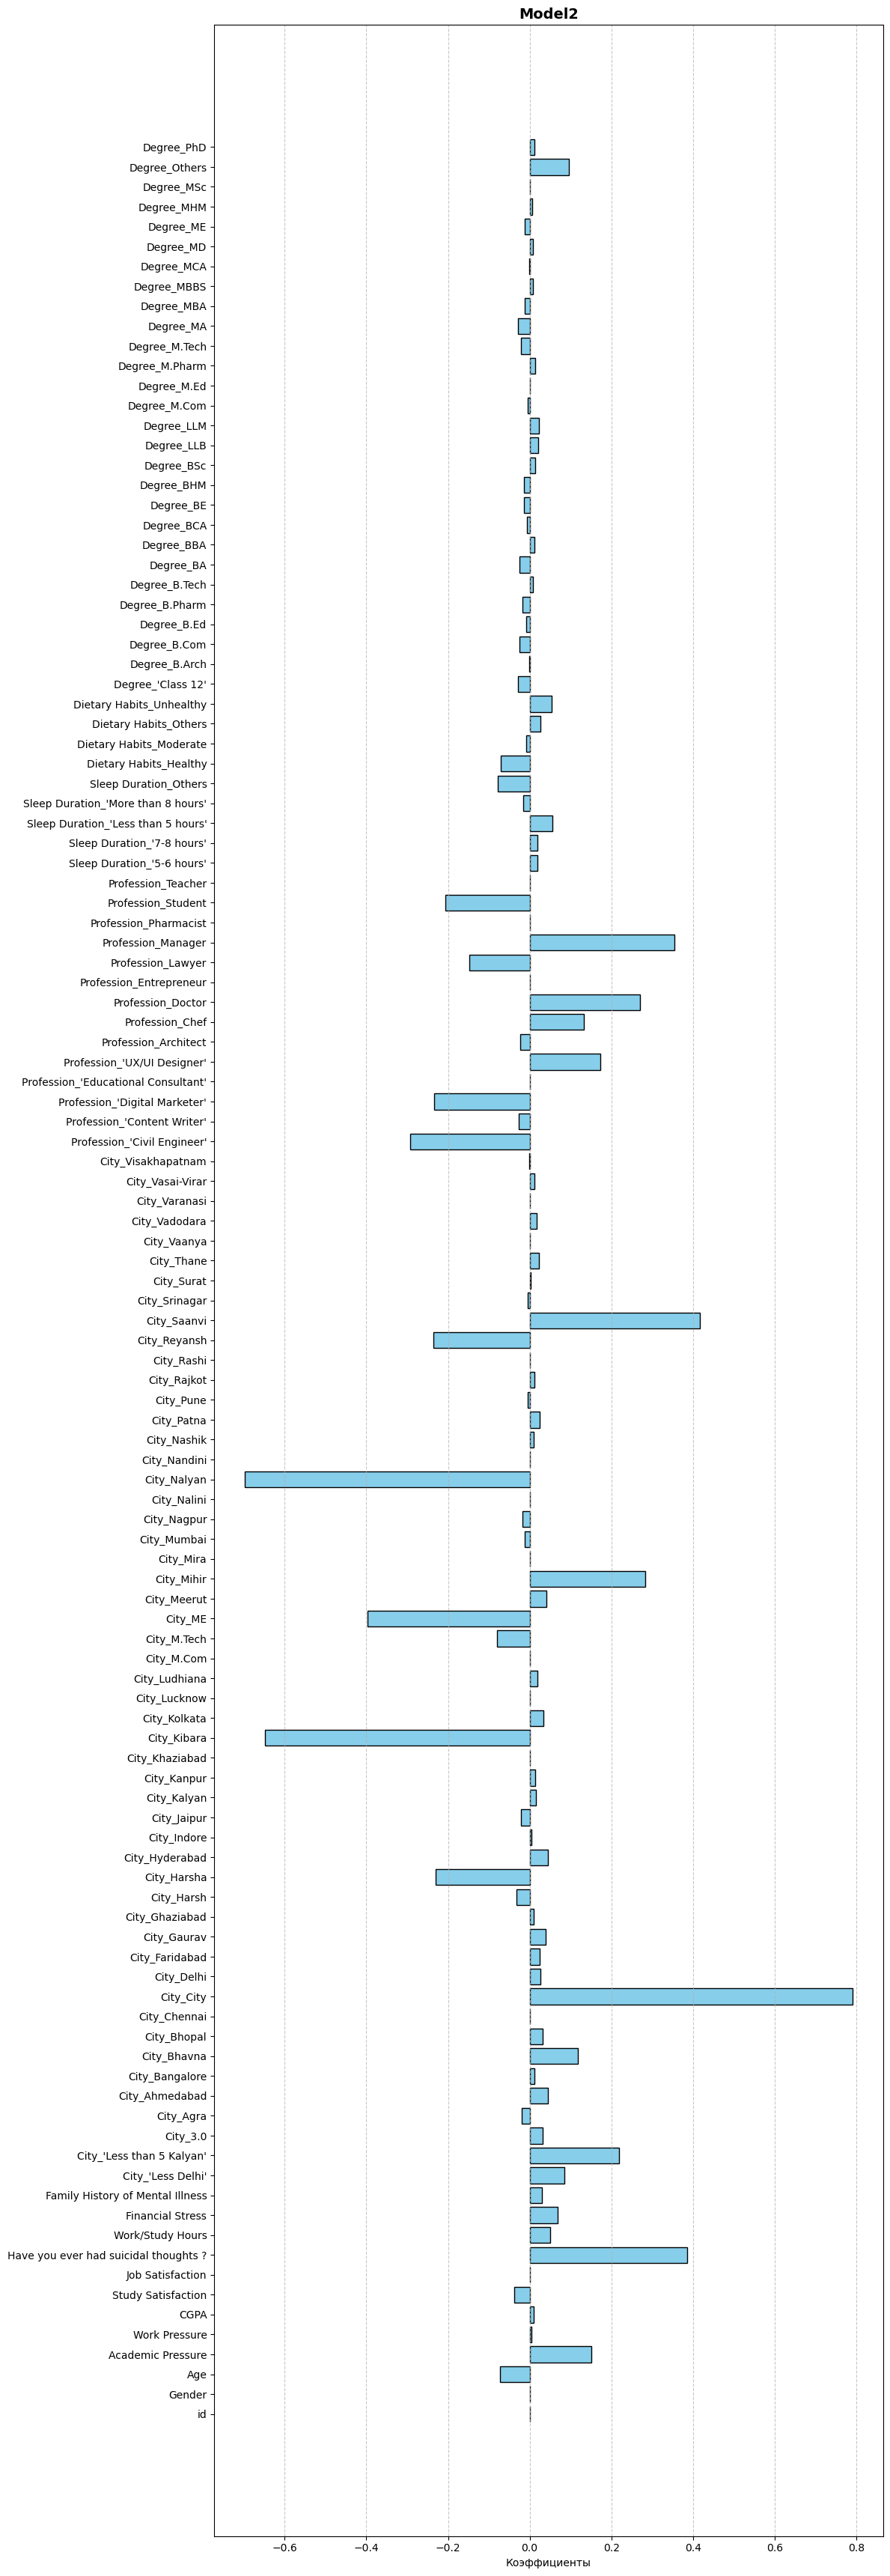

In [774]:
graph_coef(model2.coef_, X.columns, "Model2")

## Model №3

- Использовать только best_features (отобранные признаки).
- Обучить на всей выборке.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

In [781]:
model3 = LinearRegression()
model3.fit(X_best, y)

LinearRegression()

In [782]:
y_pred3 = model3.predict(X_best)

In [783]:
metrics(y, y_pred3)

MAE: 0.347
MAPE=768986272105993.375, MAPE_as_percent=76898627210599344.000%
MSE: 0.17
RMSE: 0.412
R²: 0.3



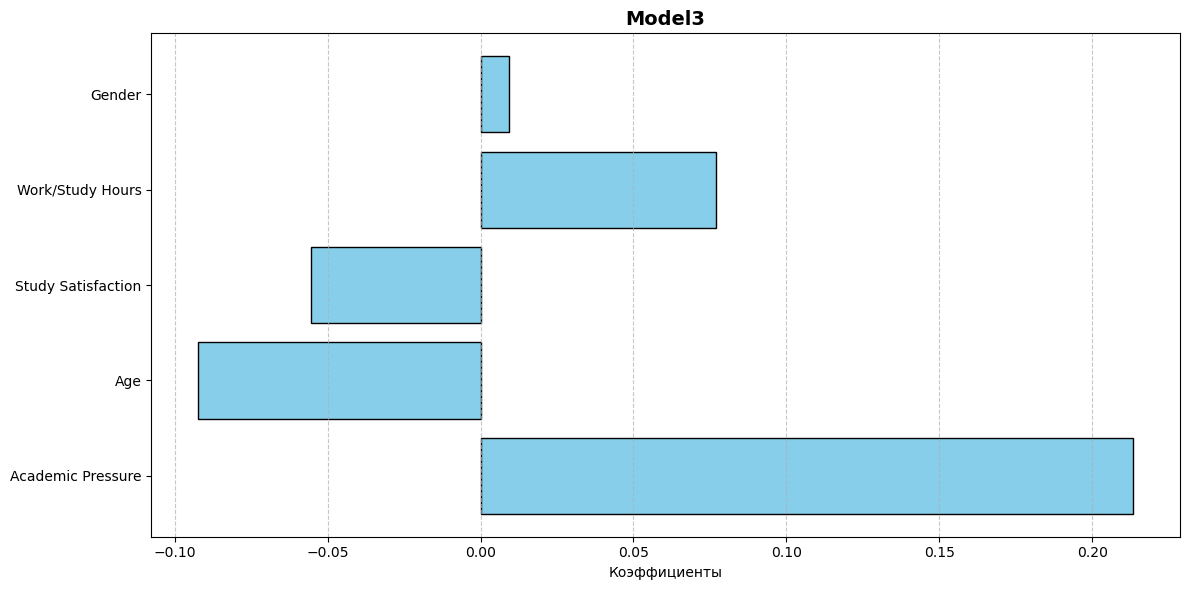

In [784]:
graph_coef(model3.coef_, X_best.columns, "Model3")

## Model №4

- Использовать best_features.
- Сделать train_test_split.
- Обучить на X_train, предсказать на X_train и X_test.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

In [787]:
model4 = LinearRegression()
model4.fit(X_train_best, y_train_best)

LinearRegression()

In [789]:
y_pred4_train = model4.predict(X_train_best)

y_pred4_test = model4.predict(X_test_best)

In [790]:
metrics(y_train_best, y_pred4_train)

MAE: 0.347
MAPE=766817639971505.750, MAPE_as_percent=76681763997150576.000%
MSE: 0.17
RMSE: 0.412
R²: 0.301



In [791]:
metrics(y_test_best, y_pred4_test)

MAE: 0.346
MAPE=780612109929714.625, MAPE_as_percent=78061210992971456.000%
MSE: 0.171
RMSE: 0.413
R²: 0.297



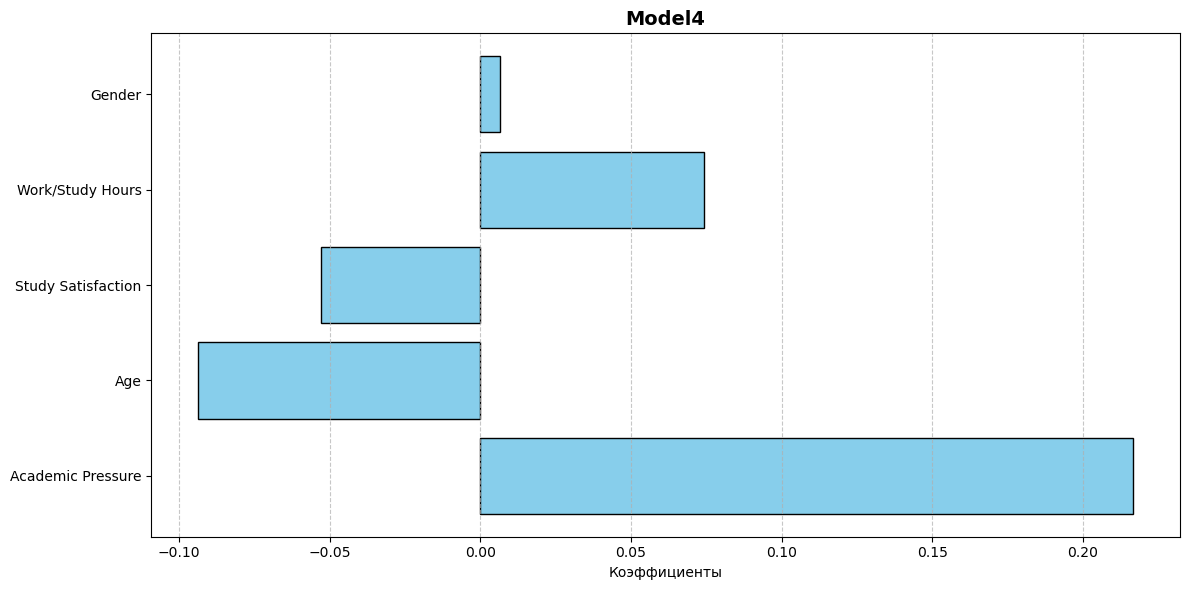

In [792]:
graph_coef(model4.coef_, X_best.columns, "Model4")